# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import pyramid.httpexceptions as exc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
cities_df = pd.DataFrame(cities)
cities_df = cities_df.rename(columns={0:"Cities"})
cities_df.head()

,Cities
0,fare
1,clyde river
2,ginda
3,dikson
4,taolanaro


In [33]:
# adding requied columns
cities_df["Cloudiness"]=""
cities_df["Country"]=""
cities_df["Date"]=""
cities_df["Humidity"]=""
cities_df["Latitude"]=""
cities_df["Longitude"]=""
cities_df["Windspeed"] =""
cities_df["Max Temp"] = ""
cities_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Windspeed,Max Temp
0,fare,,,,,,,,
1,clyde river,,,,,,,,
2,ginda,,,,,,,,
3,dikson,,,,,,,,
4,taolanaro,,,,,,,,


In [34]:
#defining openweathermap parameter
settings = {"units": "imperial", "appid": api_key}
print("Initiating Data Retrieval")
print("---------------------------------")
# looping through the city dataframe and calling current weather status using openweathermapy
for index, row in cities_df.iterrows():
    city = row['Cities']
    
    summary=["name"]
    
#monitoring the run process, populating the cities_df and excepting possible errors
    try:    
        weather_outlook = owm.get_current(city, **settings)
        data = weather_outlook(*summary)
        print(f" procesing {index} for | {data}")
        cities_df.loc[index, "Latitude"] = weather_outlook["coord"]["lat"]
        cities_df.loc[index, "Longitude"]= weather_outlook["coord"]["lon"]
        cities_df.loc[index, "Country"]= weather_outlook["sys"]["country"]
        cities_df.loc[index, "Date"]=weather_outlook["dt"]
        cities_df.loc[index, "Humidity"]= weather_outlook["main"]["humidity"]
        cities_df.loc[index, "Max Temp"]= weather_outlook["main"]["temp"]
        cities_df.loc[index, "Windspeed"]= weather_outlook["wind"]["speed"]
        cities_df.loc[index, "Cloudiness"]= weather_outlook["clouds"]["all"]
    except:
        print("city not found.... continue")
print("Data retrieval done")
    

Initiating Data Retrieval
---------------------------------
 procesing 0 for | Fare
 procesing 1 for | Clyde River
 procesing 2 for | Ginda
 procesing 3 for | Dikson
city not found.... continue
 procesing 5 for | Ushuaia
 procesing 6 for | Port Hardy
 procesing 7 for | Kahului
 procesing 8 for | Altamira
 procesing 9 for | Eydhafushi
 procesing 10 for | Lebu
 procesing 11 for | Vaini
 procesing 12 for | Port Alfred
 procesing 13 for | Nikolskoye
city not found.... continue
 procesing 15 for | Bluff
 procesing 16 for | Rocha
 procesing 17 for | Huadian
 procesing 18 for | Punta Arenas
 procesing 19 for | Guerrero Negro
 procesing 20 for | Santa Lucia
 procesing 21 for | Porto Novo
city not found.... continue
 procesing 23 for | Barrow
 procesing 24 for | Albany
 procesing 25 for | Naklo nad Notecia
 procesing 26 for | Kotka
 procesing 27 for | Kirkland Lake
 procesing 28 for | Upernavik
city not found.... continue
 procesing 30 for | Rikitea
 procesing 31 for | Yilan
 procesing 32 for |

 procesing 273 for | Alofi
 procesing 274 for | Ambilobe
city not found.... continue
 procesing 276 for | Airai
 procesing 277 for | Mildura
 procesing 278 for | Ust-Maya
 procesing 279 for | Kungurtug
 procesing 280 for | Rock Springs
 procesing 281 for | Mahebourg
 procesing 282 for | Singapore
 procesing 283 for | Andros Town
 procesing 284 for | Sitka
city not found.... continue
 procesing 286 for | Rach Gia
 procesing 287 for | Santiago
 procesing 288 for | Elko
 procesing 289 for | Francistown
 procesing 290 for | Derzhavinsk
 procesing 291 for | Bandarbeyla
 procesing 292 for | Hamilton
 procesing 293 for | Nivala
 procesing 294 for | Tolbazy
 procesing 295 for | Buala
city not found.... continue
city not found.... continue
 procesing 298 for | Jiuquan
 procesing 299 for | Koulikoro
 procesing 300 for | Praya
city not found.... continue
 procesing 302 for | Nanortalik
 procesing 303 for | Lumphat
 procesing 304 for | Namatanai
 procesing 305 for | Ponta Delgada
 procesing 306 fo

 procesing 547 for | Krasnovishersk
 procesing 548 for | Dubovskoye
 procesing 549 for | Vawkavysk
 procesing 550 for | Khairagarh
 procesing 551 for | Boralday
 procesing 552 for | Ariquemes
 procesing 553 for | Jiazi
city not found.... continue
 procesing 555 for | Ulladulla
 procesing 556 for | Lagoa
 procesing 557 for | Paita
 procesing 558 for | Alamosa
 procesing 559 for | Mutoko
 procesing 560 for | Constitucion
 procesing 561 for | Mehamn
 procesing 562 for | Piranhas
 procesing 563 for | Thanh Hoa
 procesing 564 for | Alvorada
city not found.... continue
 procesing 566 for | Grand-Santi
 procesing 567 for | Nuuk
city not found.... continue
 procesing 569 for | Kuandian
 procesing 570 for | Ust-Kulom
 procesing 571 for | Quzhou
 procesing 572 for | Pangody
 procesing 573 for | Sur
 procesing 574 for | Kaduqli
 procesing 575 for | Hasaki
city not found.... continue
 procesing 577 for | Tupiza
 procesing 578 for | Nyrob
 procesing 579 for | Taitung
 procesing 580 for | Buraydah
 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

In [39]:
cities_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Windspeed,Max Temp
0,fare,16,PF,1559828073,80,-16.7,-151.02,16.4,81.23
1,clyde river,75,CA,1559828074,51,70.47,-68.59,2.24,39.2
2,ginda,75,IN,1559828074,54,30.69,78.49,10.29,82.4
3,dikson,5,RU,1559828074,88,73.51,80.55,2.68,32.09
4,taolanaro,,,,,,,,


In [40]:
# confirm the value counts to check for missing values
cities_df.count()

Cities        630
Cloudiness    630
Country       630
Date          630
Humidity      630
Latitude      630
Longitude     630
Windspeed     630
Max Temp      630
dtype: int64

In [48]:
# Drop missing values
cities_df = cities_df.dropna(axis = 0, how='any')
cities_df.count()

Cities        570
Cloudiness    570
Country       570
Date          570
Humidity      570
Latitude      570
Longitude     570
Windspeed     570
Max Temp      570
dtype: int64

In [49]:
# save to data in csv format
cities_df.to_csv("cities_weather_data.csv")

In [59]:
# convert Date to Datetime format
cities_df["Date"] = pd.to_datetime(cities_df["Date"])
cities_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Windspeed,Max Temp
0,fare,16,PF,2019-06-06 13:34:33,80,-16.7,-151.02,16.4,81.23
1,clyde river,75,CA,2019-06-06 13:34:34,51,70.47,-68.59,2.24,39.2
2,ginda,75,IN,2019-06-06 13:34:34,54,30.69,78.49,10.29,82.4
3,dikson,5,RU,2019-06-06 13:34:34,88,73.51,80.55,2.68,32.09
5,ushuaia,40,AR,2019-06-06 13:30:37,87,-54.81,-68.31,17.22,37.87


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


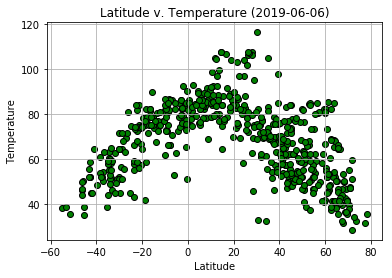

In [60]:
plt.scatter(cities_df["Latitude"],cities_df["Max Temp"], marker="o", facecolors="green", edgecolors="black", alpha = 1)
plt.title("Latitude v. Temperature (2019-06-06)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.savefig("Latitude v. Temperature.png")
plt.show()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

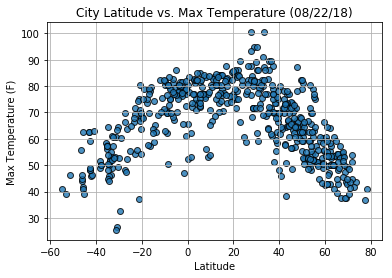

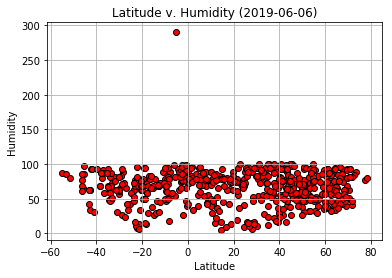

In [61]:
plt.scatter(cities_df["Latitude"], cities_df["Humidity"], marker="o", facecolors="red", edgecolors="black", alpha = 1)
plt.title("Latitude v. Humidity (2019-06-06)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("Latitude v. Humidity.png")
plt.show()

#### Latitude vs. Humidity Plot

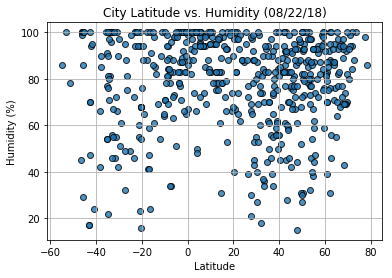

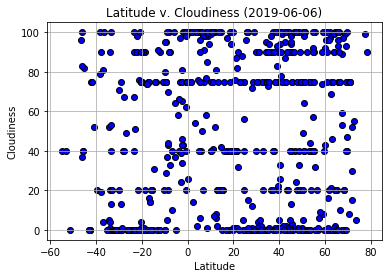

In [62]:
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha = 1)
plt.title("Latitude v. Cloudiness (2019-06-06)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("Latitude v. Cloudiness.png")
plt.show()

#### Latitude vs. Cloudiness Plot

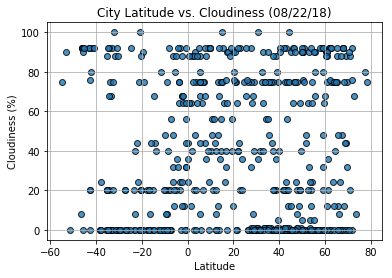

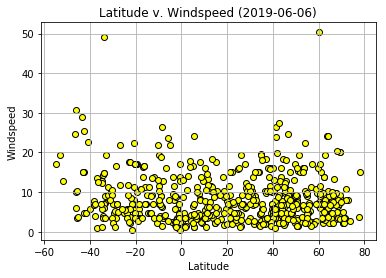

In [63]:
plt.scatter(cities_df["Latitude"], cities_df["Windspeed"], marker="o", facecolors="yellow", edgecolors="black", alpha = 1)
plt.title("Latitude v. Windspeed (2019-06-06)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.grid()
plt.savefig("Latitude v. Windspeed.png")
plt.show()

#### Latitude vs. Wind Speed Plot

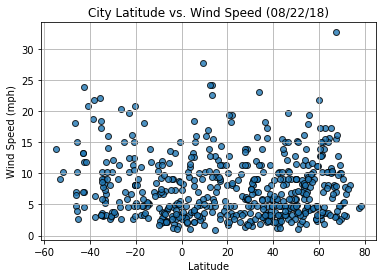